In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
festivales_bcn_16 = pd.read_pickle("./data/festivales_bcn_16_procesado.pkl")

In [105]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [106]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [107]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [108]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [109]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [110]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [111]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [112]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [113]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [114]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [115]:
festivales_bcn_16.describe().loc["mean"]

Edicio           13.90
Asistentes    32632.32
Name: mean, dtype: float64

In [116]:
festivales_bcn_16.describe().loc["50%"]

Edicio           13.0
Asistentes    12000.0
Name: 50%, dtype: float64

In [117]:
festivales_bcn_16.describe().loc["max"]

Edicio            48.0
Asistentes    228946.0
Name: max, dtype: float64

In [118]:
festivales_bcn_16.describe().loc["min"]

Edicio           2.0
Asistentes    2600.0
Name: min, dtype: float64

In [119]:
festivales_bcn_16[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera
Entrada,De Pago


Comentarios <br>
Com una mediana de unos 12 mil asistentes, el festival tipo de Barcelona es de música y con entrada pagada, con mayorpredominancia en otoño, aunque mayor concentración en junio. Es el mismo perfil que en 2017

Frecuencias relativa y absoluta

In [120]:
for catego in categoricas_destacadas:
    print(festivales_bcn_16[catego].value_counts())
    print("\n")

Ambit
Música                         20
Audiovisuals                   14
Arts visuals                    5
Arts escèniques                 4
Multidisciplinaris i altres     4
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    43
Pública     6
Mixta       1
Name: count, dtype: int64


Mes
Junio         10
Noviembre      8
Mayo           6
Julio          6
Septiembre     4
Marzo          3
Octubre        3
Enero          3
Abril          2
Agosto         2
Febrero        2
Diciembre      1
Name: count, dtype: int64


Estacion
Primavera    16
Otoño        14
Verano       12
Invierno      8
Name: count, dtype: int64


Entrada
De Pago    38
Gratis      9
Mixta       3
Name: count, dtype: int64




In [122]:
for catego in categoricas_destacadas:
    print(festivales_bcn_16[catego].value_counts()/len(festivales_bcn_16)*100)
    print("\n")

Ambit
Música                         40.0
Audiovisuals                   28.0
Arts visuals                   10.0
Arts escèniques                 8.0
Multidisciplinaris i altres     8.0
Lletres                         6.0
Name: count, dtype: float64


Titularidad
Privada    86.0
Pública    12.0
Mixta       2.0
Name: count, dtype: float64


Mes
Junio         20.0
Noviembre     16.0
Mayo          12.0
Julio         12.0
Septiembre     8.0
Marzo          6.0
Octubre        6.0
Enero          6.0
Abril          4.0
Agosto         4.0
Febrero        4.0
Diciembre      2.0
Name: count, dtype: float64


Estacion
Primavera    32.0
Otoño        28.0
Verano       24.0
Invierno     16.0
Name: count, dtype: float64


Entrada
De Pago    76.0
Gratis     18.0
Mixta       6.0
Name: count, dtype: float64




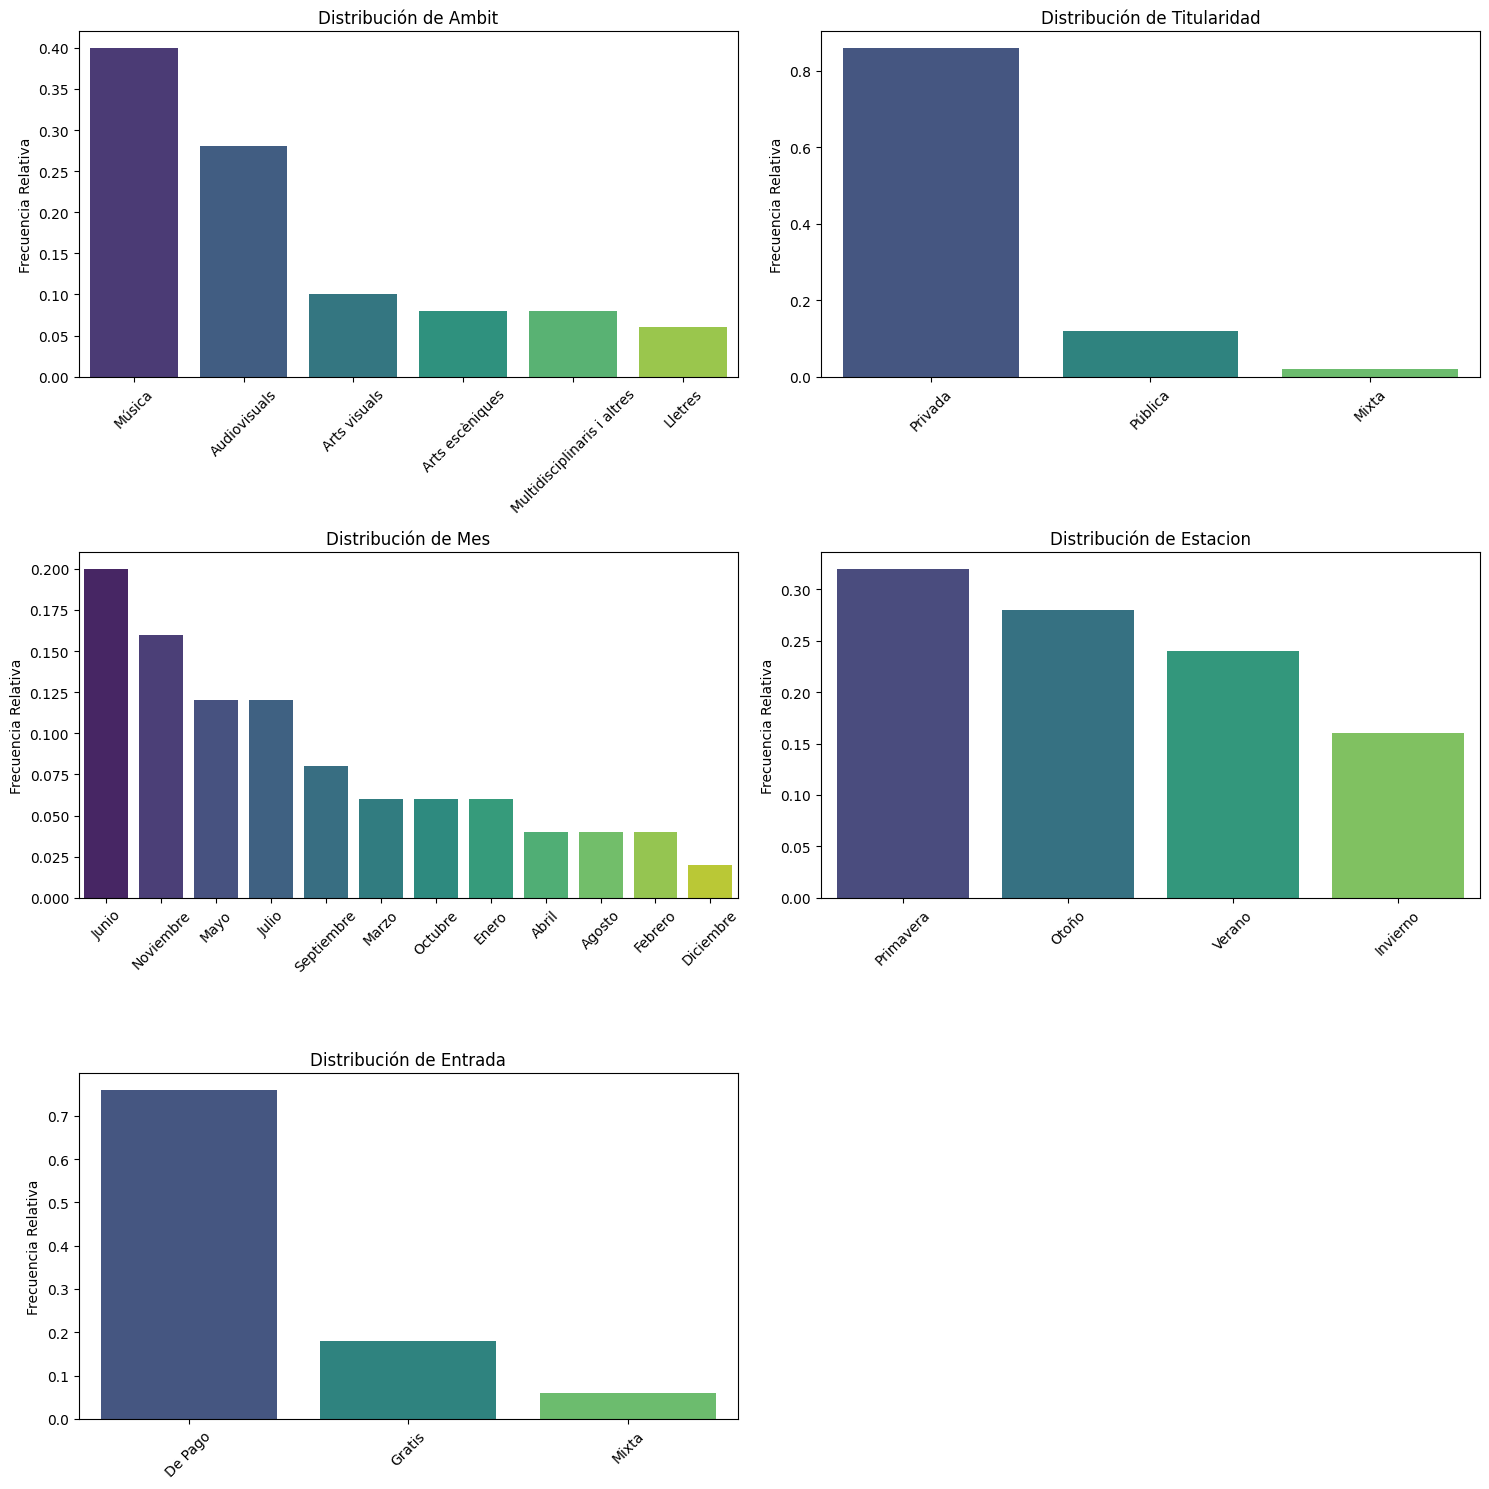

In [137]:
pinta_distribucion_categoricas(festivales_bcn_16, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado casi cuadriplica las del sector público, y proporción de festivales gratuitos vs. de pago es cercana al triple.<br>
Hay festivales programados todos los meses, aunque con predominio muy marcado de junio. La mayor concentración es en la primavera. Excepto por este punto, el resultado es muy similar al año anterior.<br>
La música es sin duda la protagonista de los festivales, seguida de lejos por los audivisuales, y mucho más lejos pero en proporciones similares, tanto escénicas como visuales y multidisiplinares y hasta letras, todas a la par. <br>
Estas conclusiones parecen repetirse en la mayoría de los años, excepto en la pandemia y justo después

Medidas de posición

In [123]:
festivales_bcn_16.describe()

,Edicio,Asistentes
count,50.000000,50.000000
mean,13.900000,32632.320000
std,9.573028,49228.068198
min,2.000000,2600.000000
25%,6.000000,6037.500000
50%,13.000000,12000.000000
75%,18.750000,33028.750000
max,48.000000,228946.000000


In [124]:
get_IQR(festivales_bcn_16,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

12.75

In [125]:
print(festivales_bcn_16["Edicio"].quantile(0.5), "\n",
    festivales_bcn_16["Edicio"].quantile(0.9), "\n",
    festivales_bcn_16["Edicio"].quantile(0.95), "\n",
    festivales_bcn_16["Edicio"].max())

13.0 
 24.200000000000003 
 28.099999999999994 
 48.0


In [126]:
get_IQR(festivales_bcn_16,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

26991.25

In [127]:
print(festivales_bcn_16["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_16["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_16["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_16["Asistentes"].max())

12000.0 
 103299.50000000001 
 129603.64999999992 
 228946.0


Comentarios: <br>
Alta dispersión en el número de asistentes. La mediana está en 12.000, unas 8.5 veces menos que el primer 90% en algo más de 100 mil, que crece ligeramente hascia el final hasta los 130 mil (y cambian la tendencia y empiezan a crecer más, aumentando la dispersión), y que luego del 95 salta a más de 228 mil, es decir que no llega a duplicarse. Esta máxima es unas 19 veces la mediana.

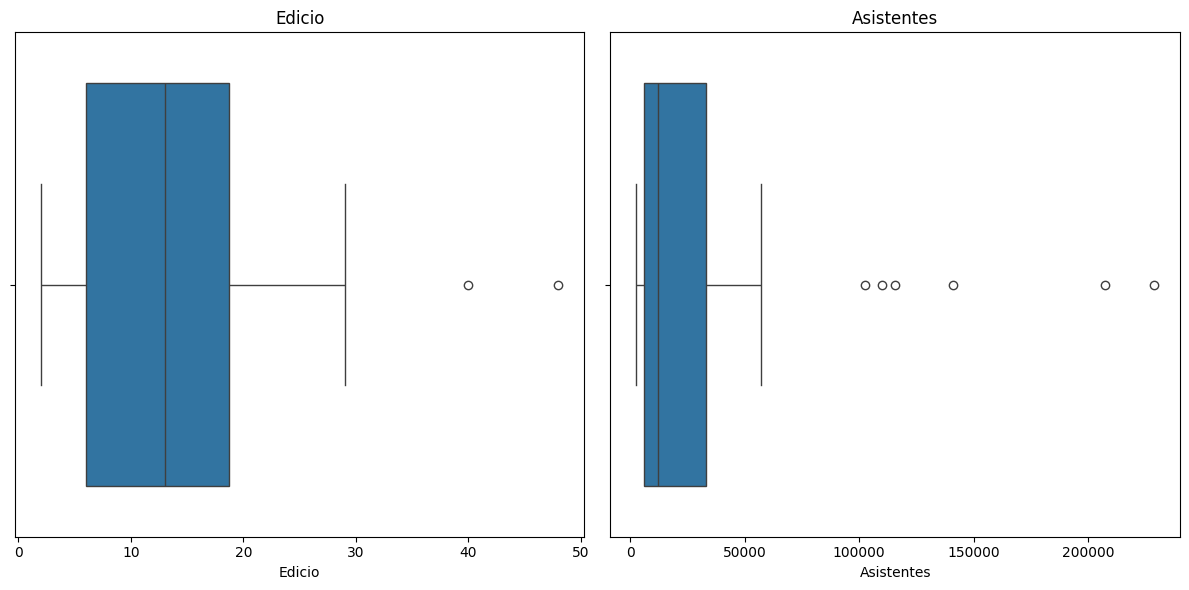

In [128]:
plot_multiple_boxplots(festivales_bcn_16, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes.

In [129]:
plot_boxplot_grouped(festivales_bcn_16, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [130]:
festivales_bcn_16.describe().loc[["std", "mean"]].T

,std,mean
Edicio,9.573028,13.90
Asistentes,49228.068198,32632.32


In [131]:
variabilidad(festivales_bcn_16)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,9.573028,13.90,0.688707
Asistentes,49228.068198,32632.32,1.508568


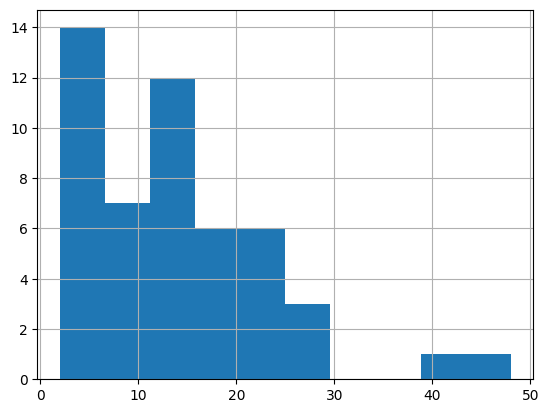

In [132]:
festivales_bcn_16["Edicio"].hist();

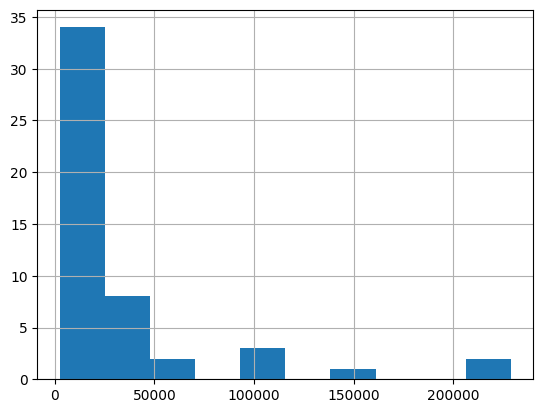

In [133]:
festivales_bcn_16["Asistentes"].hist();

Distribución

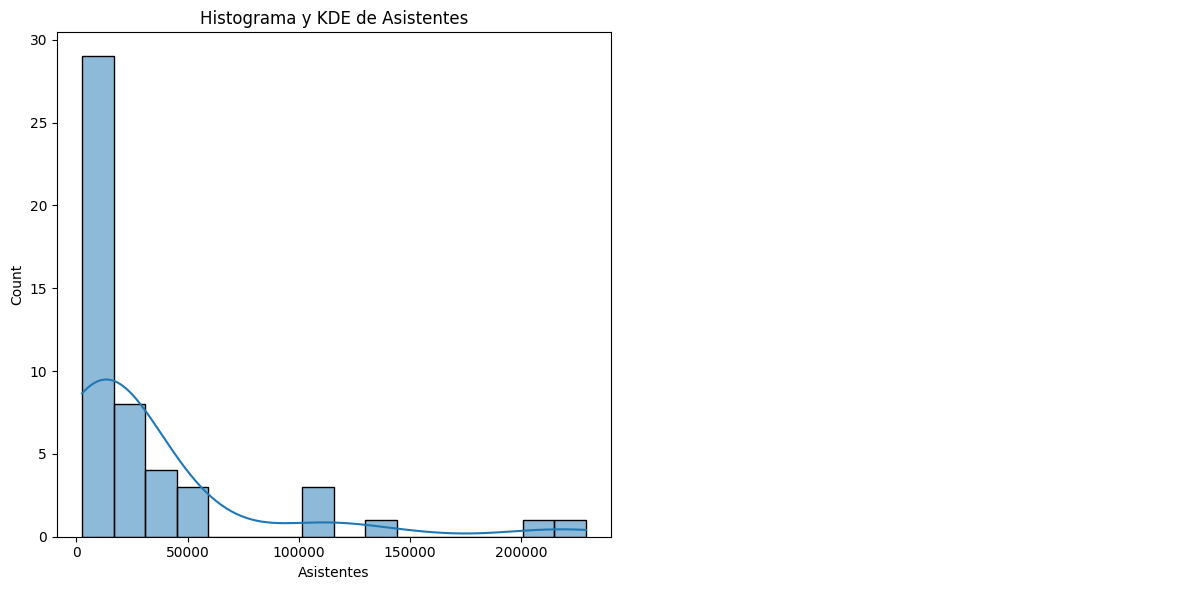

In [134]:
plot_histo_den(festivales_bcn_16, ["Asistentes"])

Anomalías outliers

(2,)


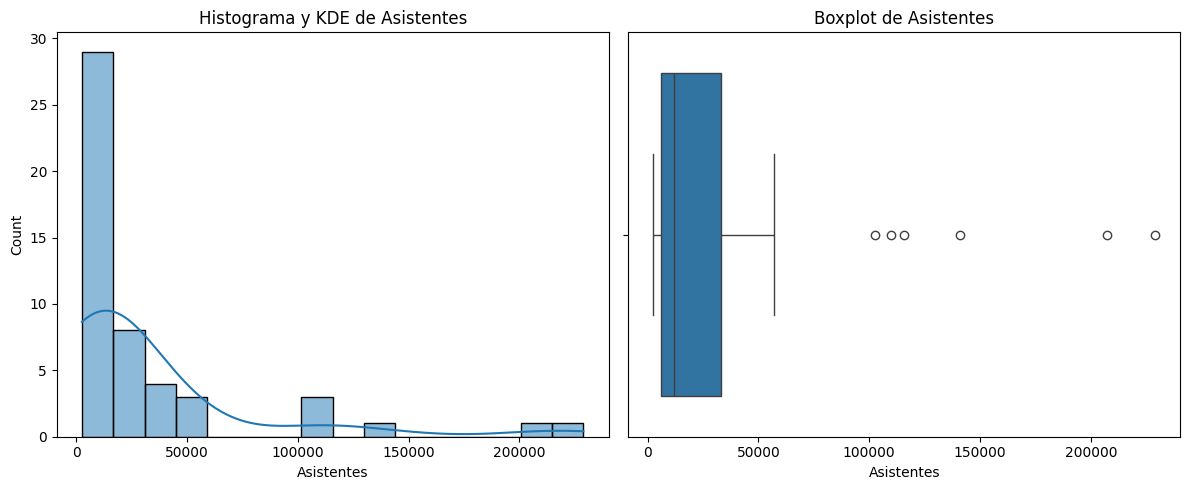

In [135]:
plot_combined_graphs(festivales_bcn_16, ["Asistentes"])

In [136]:
festivales_bcn_16

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,Audiovisuals,3.0,Americana Film Fest,Privada,Marzo,Invierno,5200.0,De Pago
2,Arts visuals,3.0,Art Photo BCN,Privada,Mayo,Primavera,2600.0,De Pago
3,Música,4.0,Bachcelona,Privada,Julio,Verano,5000.0,De Pago
4,Música,24.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Otoño,56950.0,Gratis
5,Arts visuals,11.0,Barcelona Design Week City Festival,Privada,Junio,Primavera,12000.0,Gratis
6,Lletres,19.0,Barcelona Poesia,Pública,Mayo,Primavera,5324.0,Gratis
7,Audiovisuals,5.0,Cinema Lliure a la Platja. Mostra de cinema in...,Privada,Junio,Verano,22000.0,De Pago
8,Audiovisuals,6.0,D'A Film Festival Barcelona,Privada,Abril,Primavera,10585.0,De Pago
9,Música,2.0,DGTL Festival,Privada,Agosto,Verano,30000.0,De Pago
10,Arts visuals,4.0,DOCfield. Festival de Fotografia Documental,Privada,Mayo,Primavera,141143.0,De Pago
